Scifact prompting

In [5]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00


In [6]:
from openai import OpenAI
from google.colab import userdata

OPENAI_KEY = userdata.get('OPENAI_API_KEY')
client = OpenAI(api_key=OPENAI_KEY)

In [13]:
def translate(query: str, model: str = 'gpt-4o') -> str:
  """ Translate to Serbian via OPENAI API. """

  response = client.chat.completions.create(
    model=model,
    messages=[
      {
        "role": "system",
        "content": SYSTEM_PROMPT
      },
      {
        "role": "user",
        "content": query
      }
    ],
    temperature=0.7,
    top_p=1
  )

  return response

# Scifact prompting

In [34]:
SYSTEM_PROMPT = """
I would like you to help me translate the provided passages from English into Serbian (Latin script).

Since this is a scientific dataset, it is crucial to maintain accuracy and consistency in the translation. Please adhere to the following guidelines:

1. **Accuracy of Terminology:**
   - Ensure that all scientific terms and terminology are translated accurately and consistently.
   - Use appropriate Serbian scientific terminology where applicable.
   - avoid using english terms when there is an appropriate serbian term available

2. **Numeric Data Integrity:**
   - Keep all numeric data unchanged, including decimal points and numeric values.
   - Verify that units of measurement are translated correctly and consistently according to Serbian language conventions.

3. **Context Preservation:**
   - Preserve the scientific context of the dataset to avoid misinterpretation.
   - Ensure that the translation maintains the original meaning and context.

4. **Consistency:**
   - Maintain consistency in terminology, units, and formatting throughout the entire text.

5. **Grammatical Accuracy:**
   - Follow the grammatical rules of the Serbian language and make sure to use the correct declension when translating nouns, adjectives and pronouns.
   - Ensure that the translation is grammatically correct and natural-sounding in Serbian
   - If there is a term and its acronym present, they should be also translated to serbian. You can follow the guideline bellow:

    EXAMPLE (acronym):

    ENGLISH:
    "Epidemiologic analysis of family data on blood pressure (BP) is often compromised by the effects of antihypertensive medications."

    SERBIAN:
    "Epidemiološka analiza porodičnih podataka o krvnom pritisku (BP) često je ugrožena efektima antihipertenzivnih lekova."

    REASONING:
    * The translation is not correct because there is a term "blood pressure" and the acronym BP, and it is translated as "krvnom pritisku" and BP,
    instead, the acronym should be built from the translated term, in this case that is KP.


Translate the following dataset while adhering to these guidelines.
The output should be the translated passage from English to Serbian (Latin script).

"""


# 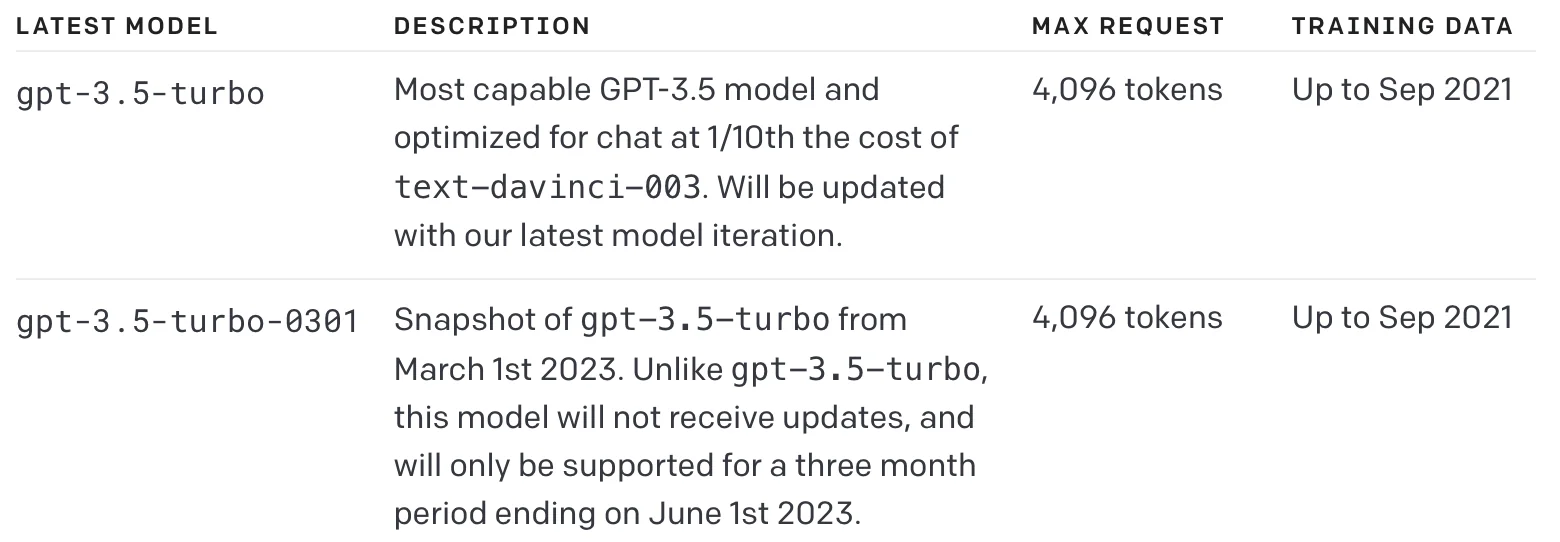

In [68]:
query = "Identifying genomic elements required for viability is central to our understanding of the basic physiology of bacterial pathogens. Recently, the combination of high-density mutagenesis and deep sequencing has allowed for the identification of required and conditionally required genes in many bacteria. Genes, however, make up only a part of the complex genomes of important bacterial pathogens. Here, we use an unbiased analysis to comprehensively identify genomic regions, including genes, domains, and intergenic elements, required for the optimal growth of Mycobacterium tuberculosis, a major global health pathogen. We found that several proteins jointly contain both domains required for optimal growth and domains that are dispensable. In addition, many non-coding regions, including regulatory elements and non-coding RNAs, are critical for mycobacterial growth. Our analysis shows that the genetic requirements for growth are more complex than can be appreciated using gene-centric analysis."

res = translate(query, model='gpt-3.5-turbo')
res.choices[0].message.content

'Identifikacija genomičkih elemenata potrebnih za vitalnost je centralna za naše razumevanje osnovne fiziologije bakterijskih patogena. Nedavno, kombinacija visokog intenziteta mutageneze i dubinskog sekvenciranja omogućila je identifikaciju gena koji su potrebni i uslovno potrebni u mnogim bakterijama. Geni, međutim, čine samo deo složenih genoma važnih bakterijskih patogena. Ovde koristimo nepristrasnu analizu kako bismo sveobuhvatno identifikovali genomski regione, uključujući gene, domene i intergeničke elemente, potrebne za optimalan rast Mycobacterium tuberculosis, važnog globalnog zdravstvenog patogena. Utvrdili smo da nekoliko proteina zajedno sadrži i domene potrebne za optimalan rast i domene koje su nepotrebne. Pored toga, mnoge nekodirajuće regione, uključujući regulatorne elemente i nekodirajuće RNK, su ključne za rast mikobakterija. Naša analiza pokazuje da su genetski zahtevi za rast složeniji nego što se može razumeti korišćenjem analize usmerene na gene.'

In [12]:
query = "Identifying genomic elements required for viability is central to our understanding of the basic physiology of bacterial pathogens. Recently, the combination of high-density mutagenesis and deep sequencing has allowed for the identification of required and conditionally required genes in many bacteria. Genes, however, make up only a part of the complex genomes of important bacterial pathogens. Here, we use an unbiased analysis to comprehensively identify genomic regions, including genes, domains, and intergenic elements, required for the optimal growth of Mycobacterium tuberculosis, a major global health pathogen. We found that several proteins jointly contain both domains required for optimal growth and domains that are dispensable. In addition, many non-coding regions, including regulatory elements and non-coding RNAs, are critical for mycobacterial growth. Our analysis shows that the genetic requirements for growth are more complex than can be appreciated using gene-centric analysis."

res = translate(query, model='gpt-4o')
res.choices[0].message.content

'Identifikacija genetskih elemenata neophodnih za održivost je centralna za naše razumevanje osnovne fiziologije bakterijskih patogena. Nedavno su kombinacija visoko-gustinske mutageneze i dubokog sekvenciranja omogućile identifikaciju neophodnih i uslovno neophodnih gena kod mnogih bakterija. Geni, međutim, čine samo deo kompleksnih genoma važnih bakterijskih patogena. Ovde koristimo nepristrasnu analizu kako bismo sveobuhvatno identifikovali genomske regione, uključujući gene, domene i intergenske elemente, neophodne za optimalan rast Mycobacterium tuberculosis, glavnog globalnog zdravstvenog patogena. Otkrili smo da nekoliko proteina zajednički sadrži i domene potrebne za optimalan rast i domene koji su nepotrebni. Pored toga, mnoge nekodirajuće regije, uključujući regulatorne elemente i nekodirajuće RNK, su kritične za mikobakterijski rast. Naša analiza pokazuje da su genetski zahtevi za rast složeniji nego što se može shvatiti korišćenjem analize usmerene na gene.'

In [52]:
query = "Neuregulin 1 (NRG1) and its receptor ErbB4 are both susceptibility genes of schizophrenia. However, little is known about the underlying mechanisms of their malfunction. Although ErbB4 is enriched in GABAergic interneurons, the role of NRG1 in excitatory synapse formation in these neurons remains poorly understood. We showed that NRG1 increased both the number and size of PSD-95 puncta and the frequency and amplitude of miniature EPSCs (mEPSCs) in GABAergic interneurons, indicating that NRG1 stimulates the formation of new synapses and strengthens existing synapses. In contrast, NRG1 treatment had no effect on either the number or size of excitatory synapses in glutamatergic neurons, suggesting its synaptogenic effect is specific to GABAergic interneurons. Ecto-ErbB4 treatment diminished both the number and size of excitatory synapses, suggesting that endogenous NRG1 may be critical for basal synapse formation. NRG1 could stimulate the stability of PSD-95 in the manner that requires tyrosine kinase activity of ErbB4. Finally, deletion of ErbB4 in parvalbumin-positive interneurons led to reduced frequency and amplitude of mEPSCs, providing in vivo evidence that ErbB4 is important in excitatory synaptogenesis in interneurons. Together, our findings suggested a novel synaptogenic role of NRG1 in excitatory synapse development, possibly via stabilizing PSD-95, and this effect is specific to GABAergic interneurons. In light of the association of the genes of both NRG1 and ErbB4 with schizophrenia and dysfunction of GABAergic system in this disorder, these results provide insight into its potential pathological mechanism."
res = translate(query, model='gpt-3.5-turbo')
res.choices[0].message.content

'Neuregulin 1 (NRG1) i njegov receptor ErbB4 su oba gena sklonosti šizofreniji. Međutim, malo se zna o osnovnom mehanizmu njihovog neispravnog funkcionisanja. Iako je ErbB4 obilno prisutan u GABAergičkim interneuronima, uloga NRG1 u formiranju egzitatornih sinapsi kod ovih neurona je slabo razumljiva. Pokazali smo da NRG1 povećava broj i veličinu PSD-95 puncta, frekvenciju i amplitudu minijaturnih EPSC-a (mEPSCs) u GABAergičkim interneuronima, što ukazuje da NRG1 stimuliše formiranje novih sinapsi i jačanje postojećih sinapsi. Nasuprot tome, tretman NRG1 nije imao nikakav uticaj na broj ili veličinu egzitatornih sinapsi u glutamatergičkim neuronima, što ukazuje da je njegov sinaptogeni efekat specifičan za GABAergičke interneurone. Tretman Ecto-ErbB4 je smanjio broj i veličinu egzitatornih sinapsi, što ukazuje da endogeni NRG1 može biti ključan za bazalno formiranje sinapsi. NRG1 bi mogao stimulisati stabilnost PSD-95 na način koji zahteva tirozin kinaznu aktivnost ErbB4. Konačno, bris

In [14]:
query = "Neuregulin 1 (NRG1) and its receptor ErbB4 are both susceptibility genes of schizophrenia. However, little is known about the underlying mechanisms of their malfunction. Although ErbB4 is enriched in GABAergic interneurons, the role of NRG1 in excitatory synapse formation in these neurons remains poorly understood. We showed that NRG1 increased both the number and size of PSD-95 puncta and the frequency and amplitude of miniature EPSCs (mEPSCs) in GABAergic interneurons, indicating that NRG1 stimulates the formation of new synapses and strengthens existing synapses. In contrast, NRG1 treatment had no effect on either the number or size of excitatory synapses in glutamatergic neurons, suggesting its synaptogenic effect is specific to GABAergic interneurons. Ecto-ErbB4 treatment diminished both the number and size of excitatory synapses, suggesting that endogenous NRG1 may be critical for basal synapse formation. NRG1 could stimulate the stability of PSD-95 in the manner that requires tyrosine kinase activity of ErbB4. Finally, deletion of ErbB4 in parvalbumin-positive interneurons led to reduced frequency and amplitude of mEPSCs, providing in vivo evidence that ErbB4 is important in excitatory synaptogenesis in interneurons. Together, our findings suggested a novel synaptogenic role of NRG1 in excitatory synapse development, possibly via stabilizing PSD-95, and this effect is specific to GABAergic interneurons. In light of the association of the genes of both NRG1 and ErbB4 with schizophrenia and dysfunction of GABAergic system in this disorder, these results provide insight into its potential pathological mechanism."
res = translate(query, model='gpt-4o')
res.choices[0].message.content

'Neuregulin 1 (NRG1) i njegov receptor ErbB4 su geni predispozicije za šizofreniju. Međutim, malo se zna o osnovnim mehanizmima njihovog neispravnog rada. Iako je ErbB4 obogaćen u GABAergičkim interneronima, uloga NRG1 u formiranju ekscitatornih sinapsi u ovim neuronima još uvek nije dovoljno shvaćena. Pokazali smo da NRG1 povećava i broj i veličinu PSD-95 punkata, kao i učestalost i amplitudu minijaturnih EPSC-ova (mEPSC-ova) u GABAergičkim interneronima, što ukazuje da NRG1 stimuliše formiranje novih sinapsi i jača postojeće sinapse. Nasuprot tome, tretman NRG1 nije imao efekta na broj ili veličinu ekscitatornih sinapsi u glutamatergičkim neuronima, što sugeriše da je njegov sinaptogeni efekat specifičan za GABAergičke internerone. Tretman Ecto-ErbB4 smanjio je i broj i veličinu ekscitatornih sinapsi, što sugeriše da endogeni NRG1 može biti kritičan za bazalno formiranje sinapsi. NRG1 bi mogao da stimuliše stabilnost PSD-95 na način koji zahteva aktivnost tirozinske kinaze ErbB4. Kon

In [63]:
query = "The long non-coding RNA nuclear paraspeckle assembly transcript 1 (NEAT1) was reported to be upregulated and be involved in oncogenic growth and drug resistance in nasopharyngeal carcinoma (NPC). However, the exact roles of NEAT1 and its underlying mechanisms in the drug resistance of NPC remain largely unclear. In this study, the expressions of NEAT1, let-72-5p and Rsf-1 mRNA were detected by reverse transcription-quantitative polymerase chain reaction (RT-qPCR). The effects of NEAT1 and let-72-5p on cell proliferation and cisplatin resistance of NPC cells were investigated by 3-(4,5-dimethylthiazol-2-yl)-2,5-diphenyl tetrazolium bromide (MTT) assay and 5-ethynyl-20-deoxyuridine (EdU) assay. Western blot analysis was performed to detect the protein levels of Rsf-1, Ras, p-Raf1, Raf1, p-MEK1, MEK1, p-ERK1/2 and ERK1/2. Xenograft tumor assay was done to elucidate the role of NEAT1 involved in NPC tumor growth in vivo. We found that NEAT1 was upregulated and let-7a-5p was downregulated in NPC tissues, as well as NPC cell lines. Inhibition of NEAT1 markedly repressed the cisplatin resistance of NPC cells. NEAT1 was demonstrated to interact with let-7a-5p. Besides, a negative correlation between NEAT1 and let-7a-5p expression was observed in NPC tissues. Rsf-1 was confirmed as a target of let-7a-5p. NEAT1 remarkably reversed the inhibitory effect of let-7q-5p on the cisplatin resistance of NPC cells in vitro. Additionally, NEAT1 knockdown inhibited the Ras-MAPK pathway in NPC cells. NEAT1 knockdown suppressed tumor growth in the presence of cisplatin in vivo. Overall, these findings suggest that NEAT1/let-7a-5p axis regulates the cisplatin resistance in NPC by targeting Rsf-1 and modulating the Ras-MAPK signaling pathway."
res = translate(query,  model='gpt-3.5-turbo')
res.choices[0].message.content

'Dugi nekodirajući RNK nuklearni paraspekularni sklopni transkript 1 (NEAT1) je prijavljen da je povećan i da je uključen u onkogeni rast i otpornost na lekove kod karcinoma nosne šupljine (NPC). Međutim, tačne uloge NEAT1 i njeni osnovni mehanizmi u otpornosti na lekove kod NPC-a ostaju uglavnom nejasni. U ovom istraživanju, ekspresije NEAT1, let-72-5p i Rsf-1 mRNA su detektovane reverznom transkripcijom-kvantitativnom polimeraznom lančanom reakcijom (RT-qPCR). Efekti NEAT1 i let-72-5p na proliferaciju ćelija i otpornost na cispaltin NPC ćelija su istraženi metodom 3-(4,5-dimetiltiazol-2-il)-2,5-difeniltetrazolijum bromid (MTT) i metodom 5-etinil-20-dezoksiridin (EdU). Analiza zapadnog blota je izvršena kako bi se detektovali nivoi proteina Rsf-1, Ras, p-Raf1, Raf1, p-MEK1, MEK1, p-ERK1/2 i ERK1/2. Istražen je ksienograftni tumorski test kako bi se razjasnila uloga NEAT1 uključena u rast tumora NPC u vivo. Utvrdili smo da je NEAT1 povećan, a let-7a-5p smanjen u NPC tkivima, kao i NPC 

In [15]:
query = "The long non-coding RNA nuclear paraspeckle assembly transcript 1 (NEAT1) was reported to be upregulated and be involved in oncogenic growth and drug resistance in nasopharyngeal carcinoma (NPC). However, the exact roles of NEAT1 and its underlying mechanisms in the drug resistance of NPC remain largely unclear. In this study, the expressions of NEAT1, let-72-5p and Rsf-1 mRNA were detected by reverse transcription-quantitative polymerase chain reaction (RT-qPCR). The effects of NEAT1 and let-72-5p on cell proliferation and cisplatin resistance of NPC cells were investigated by 3-(4,5-dimethylthiazol-2-yl)-2,5-diphenyl tetrazolium bromide (MTT) assay and 5-ethynyl-20-deoxyuridine (EdU) assay. Western blot analysis was performed to detect the protein levels of Rsf-1, Ras, p-Raf1, Raf1, p-MEK1, MEK1, p-ERK1/2 and ERK1/2. Xenograft tumor assay was done to elucidate the role of NEAT1 involved in NPC tumor growth in vivo. We found that NEAT1 was upregulated and let-7a-5p was downregulated in NPC tissues, as well as NPC cell lines. Inhibition of NEAT1 markedly repressed the cisplatin resistance of NPC cells. NEAT1 was demonstrated to interact with let-7a-5p. Besides, a negative correlation between NEAT1 and let-7a-5p expression was observed in NPC tissues. Rsf-1 was confirmed as a target of let-7a-5p. NEAT1 remarkably reversed the inhibitory effect of let-7q-5p on the cisplatin resistance of NPC cells in vitro. Additionally, NEAT1 knockdown inhibited the Ras-MAPK pathway in NPC cells. NEAT1 knockdown suppressed tumor growth in the presence of cisplatin in vivo. Overall, these findings suggest that NEAT1/let-7a-5p axis regulates the cisplatin resistance in NPC by targeting Rsf-1 and modulating the Ras-MAPK signaling pathway."
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

'Duga nekodirajuća RNA nuklearni paraspeckle assembly transcript 1 (NEAT1) je prijavljena kao upregulisana i uključena u onkogeni rast i otpornost na lekove kod nazofaringealnog karcinoma (NPC). Međutim, tačne uloge NEAT1 i njegovi osnovni mehanizmi u otpornosti na lekove kod NPC ostaju uglavnom nejasni. U ovoj studiji, izrazi NEAT1, let-72-5p i Rsf-1 mRNA su detektovani pomoću reverzne transkripcije-kvantitativne lančane reakcije polimeraze (RT-qPCR). Efekti NEAT1 i let-72-5p na proliferaciju ćelija i otpornost na cisplatin kod NPC ćelija su istraženi pomoću 3-(4,5-dimetiltiazol-2-il)-2,5-difenil tetrazolijum bromida (MTT) testa i 5-etinil-20-deoksiuridina (EdU) testa. Western blot analiza je izvedena da se detektuju nivoi proteina Rsf-1, Ras, p-Raf1, Raf1, p-MEK1, MEK1, p-ERK1/2 i ERK1/2. Xenograft tumor test je urađen da se razjasni uloga NEAT1 u rastu tumora NPC in vivo. Otkrili smo da je NEAT1 upregulisan, a let-7a-5p downregulisan u NPC tkivima, kao i u NPC ćelijskim linijama. In

In [62]:
query = "Mexico harbors great cultural and ethnic diversity, yet fine-scale patterns of human genome-wide variation from this region remain largely uncharacterized. We studied genomic variation within Mexico from over 1000 individuals representing 20 indigenous and 11 mestizo populations. We found striking genetic stratification among indigenous populations within Mexico at varying degrees of geographic isolation. Some groups were as differentiated as Europeans are from East Asians. Pre-Columbian genetic substructure is recapitulated in the indigenous ancestry of admixed mestizo individuals across the country. Furthermore, two independently phenotyped cohorts of Mexicans and Mexican Americans showed a significant association between subcontinental ancestry and lung function. Thus, accounting for fine-scale ancestry patterns is critical for medical and population genetic studies within Mexico, in Mexican-descent populations, and likely in many other populations worldwide."
res = translate(query,  model='gpt-3.5-turbo')
res.choices[0].message.content

'Meksiko obiluje velikom kulturnom i etničkom raznolikošću, ali detaljni obrasci varijacija ljudskog genoma na ovoj teritoriji uglavnom nisu karakterisani. Pratili smo genomsku varijabilnost unutar Meksika kod preko 1000 jedinki koje predstavljaju 20 autohtonih i 11 mešanih populacija. Otkrili smo značajnu genetsku stratifikaciju među autohtonim populacijama u Meksiku na različitim stepenima geografske izolacije. Neke grupe su bile toliko diferencirane koliko su Evropljani različiti od Istočnih Azijata. Prekolumbovsku genetsku podstrukturu možemo videti u autohtonom nasleđu mešovitih meksičkih jedinki širom zemlje. Štaviše, dve nezavisno fenotipski određene kohorte Meksikanaca i Meksiko-Amerikanaca pokazale su značajnu asocijaciju između podkontinentalnog nasleđa i funkcije pluća. Stoga je bitno uzeti u obzir detaljne obrasce nasleđa za medicinska i populaciona genetička istraživanja unutar Meksika, kod populacija meksičkog porekla, kao i verovatno kod mnogih drugih populacija širom sv

In [18]:
query = "Mexico harbors great cultural and ethnic diversity, yet fine-scale patterns of human genome-wide variation from this region remain largely uncharacterized. We studied genomic variation within Mexico from over 1000 individuals representing 20 indigenous and 11 mestizo populations. We found striking genetic stratification among indigenous populations within Mexico at varying degrees of geographic isolation. Some groups were as differentiated as Europeans are from East Asians. Pre-Columbian genetic substructure is recapitulated in the indigenous ancestry of admixed mestizo individuals across the country. Furthermore, two independently phenotyped cohorts of Mexicans and Mexican Americans showed a significant association between subcontinental ancestry and lung function. Thus, accounting for fine-scale ancestry patterns is critical for medical and population genetic studies within Mexico, in Mexican-descent populations, and likely in many other populations worldwide."
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

'Meksiko poseduje veliku kulturnu i etničku raznolikost, ali obrasci varijacija ljudskog genoma na finom nivou iz ovog regiona ostaju uglavnom nekarakterisani. Proučavali smo genetsku varijaciju unutar Meksika kod preko 1000 osoba koje predstavljaju 20 autohtonih i 11 mestizo populacija. Otkrili smo zapanjujuću genetsku stratifikaciju među autohtonim populacijama unutar Meksika u različitim stepenima geografske izolacije. Neke grupe su bile toliko diferencirane koliko su Evropljani različiti od Istočnih Azijata. Prekolumbijska genetska podstruktura se reprizira u autohtonom poreklu mešovitih mestizo osoba širom zemlje. Štaviše, dve nezavisno fenotipizirane kohorte Meksikanaca i Meksikano-Amerikanaca pokazale su značajnu povezanost između supkontinentalnog porekla i funkcije pluća. Dakle, uzimanje u obzir obrazaca porekla na finom nivou je kritično za medicinske i genetske studije populacija unutar Meksika, u populacijama meksičkog porekla, i verovatno u mnogim drugim populacijama širom

In [70]:
query = (
    "A human placental soluble \"high Km\" 5'-nucleotidase has been separated from \"low Km\" 5'-nucleotidase and nonspecific "
    "phosphatase by AMP-Sepharose affinity chromatography. The enzyme was purified 8000-fold to a specific activity of 25.6 mumol/min/mg. "
    "The subunit molecular mass is 53 kDa, and the native molecular mass is 210 kDa, suggesting a tetrameric structure. Soluble high Km 5'-nucleotidase "
    "is most active with IMP and GMP and their deoxy derivatives. IMP is hydrolyzed 15 times faster than AMP. The enzyme has a virtually absolute requirement "
    "for magnesium ions and is regulated by them. Purine nucleoside 5'-triphosphates strongly activate the enzyme with the potency order dATP greater than ATP "
    "greater than GTP. 2,3-Diphosphoglycerate activates the enzyme as potently as ATP. Three millimolar ATP decreased the Km for IMP from 0.33 to 0.09 mM and "
    "increased the Vmax 12-fold. ATP activation was modified by the IMP concentration. At 20 microM IMP the ATP-dependent activation curve was sigmoidal, "
    "while at 2 mM IMP it was hyperbolic. The A0.5 values for ATP were 2.26 and 0.70 mM, and the relative maximal velocities were 32.9 and 126.0 nmol/min, "
    "respectively. Inorganic phosphate shifts the hyperbolic substrate velocity relationship for IMP to a sigmoidal one. With physiological concentrations of "
    "cofactors (3 mM ATP, 1-4 mM Pi, 150 mM KCl) at pH 7.4, the enzyme is 25-35 times more active toward 100 microM IMP than 100 microM AMP. These data show "
    "that: (a) soluble human placental high Km 5'-nucleotidase coexists in human placenta with the low Km enzyme; (b) under physiological conditions the enzyme "
    "favors the hydrolysis of IMP and is critically regulated by IMP, ATP, and Pi levels; and (c) kinetic properties of ATP and IMP are each modified by the other "
    "compound suggesting complex interaction of the associated binding sites."
)
res = translate(query,  model='gpt-3.5-turbo')
res.choices[0].message.content

'Rastvorni "high Km" 5\'-nukleotidaza posteljice čoveka je odvojena od "low Km" 5\'-nukleotidaze i nespecifične fosfataze pomoću AMP-Sepharose afinitetne hromatografije. Enzim je pročišćen 8000 puta do specifične aktivnosti od 25.6 mumol/min/mg. Molekulska masa podjedinice je 53 kDa, a molekulska masa u prirodnom stanju je 210 kDa, što sugerira tetramernu strukturu. Rastvorna visoka Km 5\'-nukleotidaza je najaktivnija sa IMP i GMP i njihovim dezoksi derivatima. IMP se hidrolizuje 15 puta brže od AMP. Enzim ima skoro apsolutnu potrebu za jonskim magnezijumom i regulisan je od strane njih. Purinske nukleozid 5\'-trifosfati snažno aktiviraju enzim sa redosledom efikasnosti dATP veće od ATP veće od GTP. 2,3-Difosfoglicerat aktivira enzim jednako snažno kao ATP. Tri milimola ATP smanjuju Km za IMP sa 0.33 na 0.09 mM i povećavaju Vmax 12 puta. Aktivacija ATP-om je modifikovana koncentracijom IMP-a. Na 20 mikromola IMP-a, kriva zavisnosti od ATP-a je sigmoidna, dok je na 2 mM IMP-a hiperbolič

In [19]:
query = (
    "A human placental soluble \"high Km\" 5'-nucleotidase has been separated from \"low Km\" 5'-nucleotidase and nonspecific "
    "phosphatase by AMP-Sepharose affinity chromatography. The enzyme was purified 8000-fold to a specific activity of 25.6 mumol/min/mg. "
    "The subunit molecular mass is 53 kDa, and the native molecular mass is 210 kDa, suggesting a tetrameric structure. Soluble high Km 5'-nucleotidase "
    "is most active with IMP and GMP and their deoxy derivatives. IMP is hydrolyzed 15 times faster than AMP. The enzyme has a virtually absolute requirement "
    "for magnesium ions and is regulated by them. Purine nucleoside 5'-triphosphates strongly activate the enzyme with the potency order dATP greater than ATP "
    "greater than GTP. 2,3-Diphosphoglycerate activates the enzyme as potently as ATP. Three millimolar ATP decreased the Km for IMP from 0.33 to 0.09 mM and "
    "increased the Vmax 12-fold. ATP activation was modified by the IMP concentration. At 20 microM IMP the ATP-dependent activation curve was sigmoidal, "
    "while at 2 mM IMP it was hyperbolic. The A0.5 values for ATP were 2.26 and 0.70 mM, and the relative maximal velocities were 32.9 and 126.0 nmol/min, "
    "respectively. Inorganic phosphate shifts the hyperbolic substrate velocity relationship for IMP to a sigmoidal one. With physiological concentrations of "
    "cofactors (3 mM ATP, 1-4 mM Pi, 150 mM KCl) at pH 7.4, the enzyme is 25-35 times more active toward 100 microM IMP than 100 microM AMP. These data show "
    "that: (a) soluble human placental high Km 5'-nucleotidase coexists in human placenta with the low Km enzyme; (b) under physiological conditions the enzyme "
    "favors the hydrolysis of IMP and is critically regulated by IMP, ATP, and Pi levels; and (c) kinetic properties of ATP and IMP are each modified by the other "
    "compound suggesting complex interaction of the associated binding sites."
)
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

'Topiva ljudska placentna rastvorljiva "visokog Km" 5\'-nukleotidaza je odvojena od "niskog Km" 5\'-nukleotidaze i nespecifične fosfataze pomoću AMP-Sepharose afinitetne hromatografije. Enzim je pročišćen 8000 puta do specifične aktivnosti od 25,6 mumol/min/mg. Molekulska masa podjedinica je 53 kDa, a nativna molekulska masa je 210 kDa, što sugeriše tetramernu strukturu. Rastvorljiva visokog Km 5\'-nukleotidaza je najaktivnija sa IMP i GMP i njihovim deoksi derivatima. IMP se hidrolizuje 15 puta brže od AMP. Enzim ima gotovo apsolutnu potrebu za magnezijumovim jonima i reguliše se njima. Purinski nukleozid 5\'-trifosfati snažno aktiviraju enzim sa sledećim redosledom potencije: dATP veći od ATP veći od GTP. 2,3-Difosfoglicerat aktivira enzim jednako snažno kao ATP. Tri milimolara ATP smanjuje Km za IMP sa 0,33 na 0,09 mM i povećava Vmax 12 puta. Aktivacija ATP-a je modifikovana koncentracijom IMP. Na 20 mikroM IMP, ATP-zavisna kriva aktivacije je sigmoidna, dok je na 2 mM IMP hiperboli

In [10]:
query = (
    "UNLABELLED MesoRD is a tool for stochastic simulation of chemical reactions and diffusion. "
    "In particular, it is an implementation of the next subvolume method, which is an exact method to simulate the Markov process corresponding to the reaction-diffusion master equation. "
    "AVAILABILITY MesoRD is free software, written in C++ and licensed under the GNU general public license (GPL). "
    "MesoRD runs on Linux, Mac OS X, NetBSD, Solaris and Windows XP. It can be downloaded from http://mesord.sourceforge.net. "
    "CONTACT johan.elf@icm.uu.se; johan.hattne@embl-hamburg.de "
    "SUPPLEMENTARY INFORMATION 'MesoRD User's Guide' and other documents are available at http://mesord.sourceforge.net."
)
res = translate(query,  model='gpt-3.5-turbo')
res.choices[0].message.content

"NEOZNAČENI MesoRD je alat za stohastičku simulaciju hemijskih reakcija i difuzije. Konkretno, to je implementacija metode sledeće subvolumena, koja je tačna metoda za simulaciju Markovljevog procesa koji odgovara reakcioni-difuzionoj master jednačini. DOSTUPNOST MesoRD je besplatan softver napisan u C++ programskom jeziku i licenciran pod GNU opštom javnom licencom (GPL). MesoRD radi na Linuxu, Mac OS X-u, NetBSD-u, Solarisu i Windows XP-u. Može se preuzeti sa http://mesord.sourceforge.net. KONTAKT johan.elf@icm.uu.se; johan.hattne@embl-hamburg.de DODATNE INFORMACIJE 'MesoRD Vodič za korisnike' i drugi dokumenti su dostupni na http://mesord.sourceforge.net."

In [35]:
query = (
    "UNLABELLED MesoRD is a tool for stochastic simulation of chemical reactions and diffusion. "
    "In particular, it is an implementation of the next subvolume method, which is an exact method to simulate the Markov process corresponding to the reaction-diffusion master equation. "
    "AVAILABILITY MesoRD is free software, written in C++ and licensed under the GNU general public license (GPL). "
    "MesoRD runs on Linux, Mac OS X, NetBSD, Solaris and Windows XP. It can be downloaded from http://mesord.sourceforge.net. "
    "CONTACT johan.elf@icm.uu.se; johan.hattne@embl-hamburg.de "
    "SUPPLEMENTARY INFORMATION 'MesoRD User's Guide' and other documents are available at http://mesord.sourceforge.net."
)
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

"NEOZNAČENO MesoRD je alat za stohastičku simulaciju hemijskih reakcija i difuzije. Konkretno, to je implementacija metode sledećeg podzapreminskog pristupa, koja je tačna metoda za simulaciju Markovljevog procesa koji odgovara glavnoj jednačini reakcije-difuzije. DOSTUPNOST MesoRD je besplatan softver, napisan u C++ i licenciran pod GNU opštom javnom licencom (GPL). MesoRD radi na Linux-u, Mac OS X, NetBSD, Solaris-u i Windows XP-u. Može se preuzeti sa http://mesord.sourceforge.net. KONTAKT johan.elf@icm.uu.se; johan.hattne@embl-hamburg.de DODATNE INFORMACIJE 'MesoRD Korisnički vodič' i drugi dokumenti dostupni su na http://mesord.sourceforge.net."

In [24]:
query = "BACKGROUND Epidemiologic analysis of family data on blood pressure (BP) is often compromised by the effects of antihypertensive medications. A review of numerous clinical trials that investigated the effects of BP-lowering medications is summarized here. METHODS Published clinical trials, including 137 clinical trials with monodrug therapies and 28 clinical trials of combination drug therapies with a total of 11,739 participants, were reviewed from PubMed. Six major classes/groups of antihypertensive medications were categorized by ethnicity, including angiotensin-converting enzyme (ACE) inhibitors, alpha1-blockers, cardioselective beta-blockers (beta1-blockers), calcium channel blockers, thiazide and thiazide-like diuretics, and loop diuretics. RESULTS Using sitting or supine BP, for ethnic groups combined, monodrug therapy with ACE inhibitors showed a weighted average effect of lowering the systolic and diastolic BP by 12.5/9.5 mm Hg; alpha1-blockers by 15.5/11.7 mm Hg; beta1-blockers by 14.8/12.2 mm Hg; calcium channel blockers by 15.3/10.5 mm Hg; thiazide diuretics by 15.3/9.8 mm Hg; and loop diuretics by 15.8/8.2 mm Hg. However, ACE inhibitors, alpha1-blockers, and beta1-blockers were less effective in African Americans than in non-African Americans, whereas calcium channel blockers, thiazide diuretics, and loop diuretics were more effective in African Americans than in non-African Americans. For two-drug combination therapy with ethnic groups combined, the BP-lowering effect of the second medication, when compared to its effect as monodrug therapy, was 84% and 65% for systolic and diastolic BP, respectively. CONCLUSIONS The BP-lowering effects reported here may be used to impute the pretreatment BP levels, which can improve the information content and hence the power of epidemiologic analysis in studies where use of antihypertensive medications is a confounding factor in the BP measurements."
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

'POZADINA Epidemiološka analiza porodičnih podataka o krvnom pritisku (KP) često je ugrožena efektima antihipertenzivnih lekova. Pregled brojnih kliničkih ispitivanja koja su istraživala efekte lekova za snižavanje KP je ovde sažet. METODE Pregledana su objavljena klinička ispitivanja, uključujući 137 kliničkih ispitivanja sa monoterapijama i 28 kliničkih ispitivanja kombinovanih terapija sa ukupno 11,739 učesnika, iz PubMed-a. Šest glavnih klasa/grupa antihipertenzivnih lekova svrstano je prema etničkoj pripadnosti, uključujući inhibitore enzima koji konvertuje angiotenzin (ACE), alfa1-blokatore, kardioselektivne beta-blokatore (beta1-blokatore), blokatore kalcijumskih kanala, tiazidne i tiazidima slične diuretike, i diuretike Henleove petlje. REZULTATI Koristeći sedeći ili ležeći KP, za kombinovane etničke grupe, monoterapija sa ACE inhibitorima pokazala je ponderisani prosečan efekat snižavanja sistolnog i dijastolnog KP za 12.5/9.5 mm Hg; alfa1-blokatori za 15.5/11.7 mm Hg; beta1-b

In [25]:
query = "The Set1-containing complex COMPASS, which is the yeast homolog of the human MLL complex, is required for mono-, di-, and trimethylation of lysine 4 of histone H3. We have performed a comparative global proteomic screen to better define the role of COMPASS in histone trimethylation. We report that both Cps60 and Cps40 components of COMPASS are required for proper histone H3 trimethylation, but not for proper regulation of telomere-associated gene silencing. Purified COMPASS lacking Cps60 can mono- and dimethylate but is not capable of trimethylating H3(K4). Chromatin immunoprecipitation (ChIP) studies indicate that the loss subunits of COMPASS required for histone trimethylation do not affect the localization of Set1 to chromatin for the genes tested. Collectively, our results suggest a molecular requirement for several components of COMPASS for proper histone H3 trimethylation and regulation of telomere-associated gene expression, indicating multiple roles for different forms of histone methylation by COMPASS."
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

'Kompleks COMPASS koji sadrži Set1, a koji je kvasčev homolog ljudskog MLL kompleksa, potreban je za mono-, di- i trimetilaciju lizina 4 histona H3. Izvršili smo komparativni globalni proteomski skrining kako bismo bolje definisali ulogu kompleksa COMPASS u trimetilaciji histona. Izveštavamo da su i komponente Cps60 i Cps40 kompleksa COMPASS potrebne za pravilnu trimetilaciju histona H3, ali ne i za pravilnu regulaciju ćutanja gena povezanih sa telomerima. Pročišćeni kompleks COMPASS koji nedostaje Cps60 može vršiti mono- i dimetilaciju, ali nije sposoban za trimetilaciju H3(K4). Studije imunoprecipitacije hromatina (ChIP) ukazuju na to da gubitak podjedinica kompleksa COMPASS koje su potrebne za trimetilaciju histona ne utiče na lokalizaciju Set1 na hromatin za testirane gene. Zajedno, naši rezultati sugerišu molekularnu potrebu za nekoliko komponenti kompleksa COMPASS za pravilnu trimetilaciju histona H3 i regulaciju ekspresije gena povezanih sa telomerima, ukazujući na višestruke ul

In [26]:
query = "We report a simple method, using p53 suppression and nontransforming L-Myc, to generate human induced pluripotent stem cells (iPSCs) with episomal plasmid vectors. We generated human iPSCs from multiple donors, including two putative human leukocyte antigen (HLA)-homozygous donors who match ∼20% of the Japanese population at major HLA loci; most iPSCs are integrated transgene-free. This method may provide iPSCs suitable for autologous and allologous stem-cell therapy in the future."
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

'Izveštavamo o jednostavnom metodu, koristeći supresiju p53 i netransformišući L-Myc, za generisanje ljudskih indukovanih pluripotentnih matičnih ćelija (iPSCs) sa epizomalnim plazmidnim vektorima. Generisali smo ljudske iPSCs od više donora, uključujući dva pretpostavljena donora homozigotna za ljudski leukocitni antigen (HLA), koji odgovaraju ∼20% japanske populacije na glavnim HLA lokusima; većina iPSCs su bez integrisanih transgena. Ovaj metod može obezbediti iPSCs pogodne za autologne i alologne terapije matičnim ćelijama u budućnosti.'

In [32]:
query = "Imunološko pamćenje je ključna karakteristika adaptivnog imuniteta i važan cilj strategija vakcinacije. Ovde ističemo napredak u razumevanju različitih podgrupa T limfocita koji pružaju akutnu i dugoročnu zaštitu od infekcije. Ovo uključuje nove uvide u transkripcione faktore, kao i gornje 'pionirske' faktore koji regulišu njihovu dostupnost ključnim mestima regulacije gena, kao i metaboličke regulatore koji doprinose diferencijaciji efektora i podgrupa memorije; ontogeneza i definisanje karakteristika limfocita rezidentne memorije; i poreklo izuzetne heterogenosti koju pokazuju aktivirane T ćelije. Zajedno, ovi nalazi naglašavaju napredak u razjašnjavanju osnovnih puteva koji kontrolišu diverzifikaciju u T ćelijskim odgovorima, ali takođe otkrivaju praznine u znanju, kao i izazove koji nastaju pri primeni ovog znanja za racionalno izazivanje željenih T ćelijskih odgovora kroz vakcinaciju i imunoterapiju."
res = translate(query,  model='gpt-4o')
res.choices[0].message.content

"Imunološko pamćenje je ključna karakteristika adaptivnog imuniteta i važan cilj strategija vakcinacije. Ovde ističemo napredak u razumevanju različitih podgrupa T limfocita koji pružaju akutnu i dugoročnu zaštitu od infekcije. Ovo uključuje nove uvide u transkripcione faktore, kao i gornje 'pionirske' faktore koji regulišu njihovu dostupnost ključnim mestima regulacije gena, kao i metaboličke regulatore koji doprinose diferencijaciji efektora i podgrupa memorije; ontogenezu i definisanje karakteristika limfocita rezidentne memorije; i poreklo izuzetne heterogenosti koju pokazuju aktivirane T ćelije. Zajedno, ovi nalazi naglašavaju napredak u razjašnjavanju osnovnih puteva koji kontrolišu diverzifikaciju u T ćelijskim odgovorima, ali takođe otkrivaju praznine u znanju, kao i izazove koji nastaju pri primeni ovog znanja za racionalno izazivanje željenih T ćelijskih odgovora kroz vakcinaciju i imunoterapiju.\n\n*** ISSUES ***\nNema problema u skladu sa navedenim smernicama."